In [1]:
import tweepy
import pandas as pd
import matplotlib as plt
df = pd.read_csv("LDP EOP DATA.csv")

import numpy as np

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

import spacy
from spacy import displacy
# Load the spaCy model
nlp = spacy.load('en_core_web_sm') #sm does not use vectors
                                   #but md does use vectors

In [2]:
over_sat = df["Q2_1"]
#very great extent 5
len(over_sat)
num = 0
for dummy in over_sat:
    if over_sat[num] == "Very great extent 5":
        over_sat[num] = 5
    if over_sat[num] == 'Some\nextent\n\n3\n':
        over_sat[num] = 3
    if over_sat[num] == "Great\nextent\n4\n":
        over_sat[num] = 4
    if over_sat[num] == "Not at all 1":
        over_sat[num] = 1
    if over_sat[num] == "Little\nextent\n2\n":
        over_sat[num] = 2
    num += 1

In [3]:
over_sat[404]

1

In [4]:
over_sat
over_sat = pd.DataFrame(data=over_sat)

over_sat = over_sat.drop(over_sat.index[0])
over_sat = over_sat.drop(over_sat.index[0])
over_sat.head()

,Q2_1
2,4
3,5
4,5
5,5
6,5


In [5]:
over_sat.head()
dats = np.arange(2,5772)

In [6]:
over_sat["Nums"] = dats
over_sat.head()

,Q2_1,Nums
2,4,2
3,5,3
4,5,4
5,5,5
6,5,6


In [7]:
over_sat["Q2_1"] = over_sat["Q2_1"].apply(pd.to_numeric)

AttributeError: module 'matplotlib' has no attribute 'show'

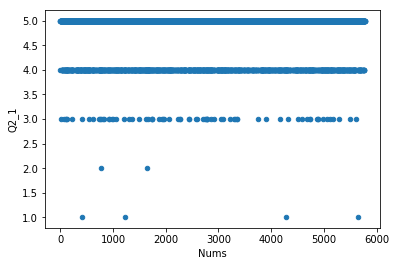

In [11]:
over_sat.plot.scatter("Nums","Q2_1")
plt.show()

In [9]:
over_sat.plot(kind='scatter', x=dats, y='Q2_1')

KeyError: '[   2    3    4 ... 5769 5770 5771] not in index'

In [ ]:
string = df["Q4"][21]
string


In [ ]:
# Run analysis
results = analyzer.polarity_scores(string)
results

In [ ]:
compound = results["compound"]
pos = results["pos"]
neu = results["neu"]
neg = results["neg"]

In [ ]:
doc2 = nlp(string)

        # Add a title to the document
doc2.user_data['title'] = 'Tweet Snippet'

        # Render the visualization
displacy.render(doc2, style='ent', jupyter=True)